<a href="https://colab.research.google.com/github/CesarPortales/BootCamp/blob/master/Copia_de_Practica_final_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Carga de Librerías y funciones útiles

In [0]:
import math

# Función que calcula la distancia entre dos puntos
# Desde el módulo de arquitectura, he planteado que iba a hacer un trabajo sobre información turística.
# Para este ejercicio, se añadirá información sobre la distancia que hay a museos y transportes destacados
def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598 
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [0]:
#Cargamos el fichero de airbnb

from google.colab import drive
drive.mount('/content/drive/')
ruta="/content/drive/My Drive/PracticaCesarPortales/data/"
ruta1=ruta + "airbnb-listings-extract.csv"
df_Completo= pd.read_csv(ruta1, sep=';', decimal='.')

df_Completo.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(14780, 89)

Desde el prinicipio del Máster se nos dijo que trabajásemos con datos referentes a Madrid. El dataset de airbnb viene muy sucio, con mucho ruido, y con datos de muy diferentes países.

Haciendo pruebas previas al ejercicio, si empezaba haciendo la división de los datos en train y test y después filtraba los datos de Madrid, había ocasiones en que se obtenían resultados muy desproporcionados al eliminar los datos sobrantes.

Por eso, y como esto no implica haber examinado los datos, he optado por filtrar los datos de España antes de hacer la división en train y test

Dado que (como se verá más adelante) al seleccionar los datos de Madrid hay que hacer una exploración profunda, y se podría producir algún sesgo en la investigación, este paso ya si que se dará con los datos divididos.

In [0]:
print("Las dimensiones del dataset son:", df_Completo.shape)
df_Madrid = df_Completo.drop(df_Completo[df_Completo.Country != "Spain"].index)
print("Las dimensiones del dataset una vez seleccionados los datos de España son:", df_Madrid.shape)

Las dimensiones del dataset son: (14780, 89)
Las dimensiones del dataset una vez seleccionados los datos de España son: (14001, 89)


In [0]:
#Procedemos a hacer la división en train y en test
from sklearn.model_selection import train_test_split

train, test= train_test_split(df_Madrid, test_size = 0.2, random_state=0, shuffle=True)

print('Datos train: ', train.shape)
print('Datos test:  ', test.shape)

Datos train:  (11200, 89)
Datos test:   (2801, 89)


A partir de este momento, hasta finalizar el análisis de datos, trabajaremos solo sobre los datos de entrenamiento, y todas las operaciones que se realicen, se repetirán posteriormente sobrer los datos de test

In [0]:
#Guardaremos los datos de train y test en sus correspondiente ficheros csv.
#El motivo es que será más cómodo cargarlos cuando se neceisten e importarlos con estructura de dataframe de pandas
# con las ventajas que esto conlleva (que se ha perdido al hacer la división)
ruta2=ruta + 'train.csv'
ruta3=ruta + 'test.csv'
train.to_csv(ruta2, sep=';', decimal='.', index=False)
test.to_csv(ruta3, sep=';', decimal='.', index=False)

# 1.- Análisis de datos

Cargamos los datos de entrenamiento

In [0]:
df_train = pd.read_csv(ruta2, sep=';', decimal='.')

In [0]:
# Vamos a añadir columnas en las que calcularemos la distancia entre los alojamientos y diferentes puntos de interés turístico
# para ver si tienen influencia en el precio

#Calculamos distancias al "Paseo de los museos"

lat_museos = 40.4137859
lon_museos = -3.6943158

df_train['Dist_Museos']=df_train.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_museos,lon_museos),axis=1)

#Calculamos distancia al aeropuerto de Madrid-Barajs

lat_aeropuerto = 40.4983363
lon_aeropuerto = -3.5697869

df_train['Dist_Aeropuerto']=df_train.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_aeropuerto,lon_aeropuerto),axis=1)

# Calculamos distancia a la estación de Atocha

lat_atocha = 40.4063347
lon_atocha = -3.6922783

df_train['Dist_Atocha']=df_train.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_atocha,lon_atocha),axis=1)

# Calculamos distancia a la estación de Chamartín

lat_chamar = 40.4718949
lon_chamar = -3.6847452

df_train['Dist_Chamartin']=df_train.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_atocha,lon_atocha),axis=1)
df_train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11160,11161,11162,11163,11164,11165,11166,11167,11168,11169,11170,11171,11172,11173,11174,11175,11176,11177,11178,11179,11180,11181,11182,11183,11184,11185,11186,11187,11188,11189,11190,11191,11192,11193,11194,11195,11196,11197,11198,11199
ID,11638814,17914450,3771156,15525579,14929245,10939061,1061216,10490005,17933917,5791993,2731726,14374077,15975417,12999503,3762974,6308674,11050879,9069145,12383948,15593453,13385347,6336425,1717189,4018990,4573540,6478626,13663147,14704409,3173812,3811518,11774591,1755242,7907450,7230128,13993747,4799940,12914811,6641567,11312892,4692716,...,15652811,4791617,14033209,15446090,13790852,4786128,8064917,14243190,4969560,6615853,12878869,12402651,4330844,15245145,15458474,13795499,15253701,13196987,17505027,15741956,494434,16586287,17751153,14061933,15081897,8315255,5929004,1459831,15638219,7272682,14701802,6484871,15154841,14961893,16686992,13985137,12983112,13523658,5300343,12876691
Listing Url,https://www.airbnb.com/rooms/11638814,https://www.airbnb.com/rooms/17914450,https://www.airbnb.com/rooms/3771156,https://www.airbnb.com/rooms/15525579,https://www.airbnb.com/rooms/14929245,https://www.airbnb.com/rooms/10939061,https://www.airbnb.com/rooms/1061216,https://www.airbnb.com/rooms/10490005,https://www.airbnb.com/rooms/17933917,https://www.airbnb.com/rooms/5791993,https://www.airbnb.com/rooms/2731726,https://www.airbnb.com/rooms/14374077,https://www.airbnb.com/rooms/15975417,https://www.airbnb.com/rooms/12999503,https://www.airbnb.com/rooms/3762974,https://www.airbnb.com/rooms/6308674,https://www.airbnb.com/rooms/11050879,https://www.airbnb.com/rooms/9069145,https://www.airbnb.com/rooms/12383948,https://www.airbnb.com/rooms/15593453,https://www.airbnb.com/rooms/13385347,https://www.airbnb.com/rooms/6336425,https://www.airbnb.com/rooms/1717189,https://www.airbnb.com/rooms/4018990,https://www.airbnb.com/rooms/4573540,https://www.airbnb.com/rooms/6478626,https://www.airbnb.com/rooms/13663147,https://www.airbnb.com/rooms/14704409,https://www.airbnb.com/rooms/3173812,https://www.airbnb.com/rooms/3811518,https://www.airbnb.com/rooms/11774591,https://www.airbnb.com/rooms/1755242,https://www.airbnb.com/rooms/7907450,https://www.airbnb.com/rooms/7230128,https://www.airbnb.com/rooms/13993747,https://www.airbnb.com/rooms/4799940,https://www.airbnb.com/rooms/12914811,https://www.airbnb.com/rooms/6641567,https://www.airbnb.com/rooms/11312892,https://www.airbnb.com/rooms/4692716,...,https://www.airbnb.com/rooms/15652811,https://www.airbnb.com/rooms/4791617,https://www.airbnb.com/rooms/14033209,https://www.airbnb.com/rooms/15446090,https://www.airbnb.com/rooms/13790852,https://www.airbnb.com/rooms/4786128,https://www.airbnb.com/rooms/8064917,https://www.airbnb.com/rooms/14243190,https://www.airbnb.com/rooms/4969560,https://www.airbnb.com/rooms/6615853,https://www.airbnb.com/rooms/12878869,https://www.airbnb.com/rooms/12402651,https://www.airbnb.com/rooms/4330844,https://www.airbnb.com/rooms/15245145,https://www.airbnb.com/rooms/15458474,https://www.airbnb.com/rooms/13795499,https://www.airbnb.com/rooms/15253701,https://www.airbnb.com/rooms/13196987,https://www.airbnb.com/rooms/17505027,https://www.airbnb.com/rooms/15741956,https://www.airbnb.com/rooms/494434,https://www.airbnb.com/rooms/16586287,https://www.airbnb.com/rooms/17751153,https://www.airbnb.com/rooms/14061933,https://www.airbnb.com/rooms/15081897,https://www.airbnb.com/rooms/8315255,https://www.airbnb.com/rooms/5929004,https://www.airbnb.com/rooms/1459831,https://www.airbnb.com/rooms/15638219,https://www.airbnb.com/rooms/7272682,https://www.airbnb.com/rooms/14701802,https://www.airbnb.com/rooms/6484871,https://www.airbnb.com/rooms/15154841,https://www.airbnb.com/rooms/14961893,https://www.airbnb.com/rooms/16686992,https://www.airbnb.com/rooms/13985137,https://www.airbnb.com/rooms/12983112,https://www.airbnb.com/rooms/13523658,https

In [0]:
#Cambiasmos la configuración de pandas para que cuando ejecutemos instrucciones que muestren "listados largos" se muestre el resultado completo
pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

#Visualizamos los campos disponibles con sus correspondientes tipos de datos
df_train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

 Por aligerar el dataset, empezaremos filtrando solo los datos de Madrid.
 En principio se podrían usar campos como  'Zip Code' o 'City', pero se observa que el que tiene menos ruido es el campo 'Smart Location'

In [0]:
lista_madrid =df_train['Smart Location'].unique().tolist()
print("Datos encontrados en el campo 'Smart Location:'", lista_madrid)
print("Datos antes de filtrar:", df_train.shape)
#Creamos una lista con los valores que se hacen referencia a la ciudad de Madrid
lista_madrid_0= ['Madrid, Spain','Madrid, Comunidad de Madrid, ES, Spain','Madrid , Spain','Madri, Spain','Delicias-Madrid, Spain','madrid, Spain',
                 'Madrid, Comunidad de Madrid, ESPANA, Spain','Madid, Spain','La Elipa, Spain','Comunidad de Madrid, Spain','Aravaca (Madrid), Spain','Ventas, Spain','Chueca, Spain',
                 'Chueca, Madrid, Spain','Delicias, Spain','Madrid, Vallecas (Fontarrón), Spain', 'MADRID, Spain','Centro, Spain','Centro, Madrid, Spain', 'MADRID , Spain', 
                 'villa verde bajo, Spain','Aravaca , Spain']
# Nos quedamos solo con los elementos incluidos en la lista de valores que implican pertencer a Madrid

df_train= df_train[df_train['Smart Location'].isin(lista_madrid_0)]
print("Datos después de filtrar:", df_train.shape)

Datos encontrados en el campo 'Smart Location:' ['Madrid, Spain', 'Barcelona, Spain', 'Madrid, Comunidad de Madrid, ES, Spain', 'Madrid, Comunidad de Madrid, ESPANA, Spain', 'Algaida, Spain', '马德里, Spain', 'Alcúdia, Spain', 'Son Vida, Spain', 'Sant Joan, Spain', 'Santa Margalida, Spain', 'Selva, Spain', 'Alaró, Spain', 'Palma de Mallorca , Spain', 'Santa Margalida , Spain', 'Can Pastilla, Spain', 'La Puebla, Spain', 'Pollença, Spain', 'Muro (Mallorca), Spain', 'Betlem, Spain', 'Sóller, Spain', 'Búger, Spain', 'Valldemossa, Spain', 'Manacor, Spain', 'Costitx, Spain', 'Pollensa, Spain', 'Binissalem, Spain', 'Madrid, Vallecas (Fontarrón), Spain', 'Son Veri Nou , Llucmajor , Spain', 'Ariany, Spain', 'Petra, Spain', 'Inca, Spain', 'Palma, Spain', 'Madrid , Spain', 'Alcudia, Spain', 'Deià, Spain', 'Pozuelo, Spain', 'Campos, Spain', 'Provensals, Spain', 'Aravaca (Madrid), Spain', 'Cala Santanyí, Spain', 'Rotes Velles, Spain', 'Centro, Spain', 'Muro, Spain', 'Santa Ponsa, Spain', 'Palma de Mal

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:

dataframe = df_train.select_dtypes(include=['float64'])
print(dataframe.tail(10))
dataframe.fillna(0,inplace=True)
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['Price'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=12) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
print(X_pca)
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 

       Host Response Rate  Host Acceptance Rate  Host Listings Count  \
11190               100.0                   NaN                  3.0   
11191               100.0                   NaN                 68.0   
11192               100.0                   NaN                 10.0   
11193               100.0                   NaN                  5.0   
11194               100.0                   NaN                  1.0   
11195                90.0                   NaN                  2.0   
11196                57.0                   NaN                  1.0   
11197                 NaN                   NaN                  1.0   
11198               100.0                   NaN                  1.0   
11199                 NaN                   NaN                  1.0   

       Host Total Listings Count   Latitude  Longitude  Bathrooms  Bedrooms  \
11190                        3.0  40.428049  -3.676932        1.0       1.0   
11191                       68.0  40.412327  -3.6

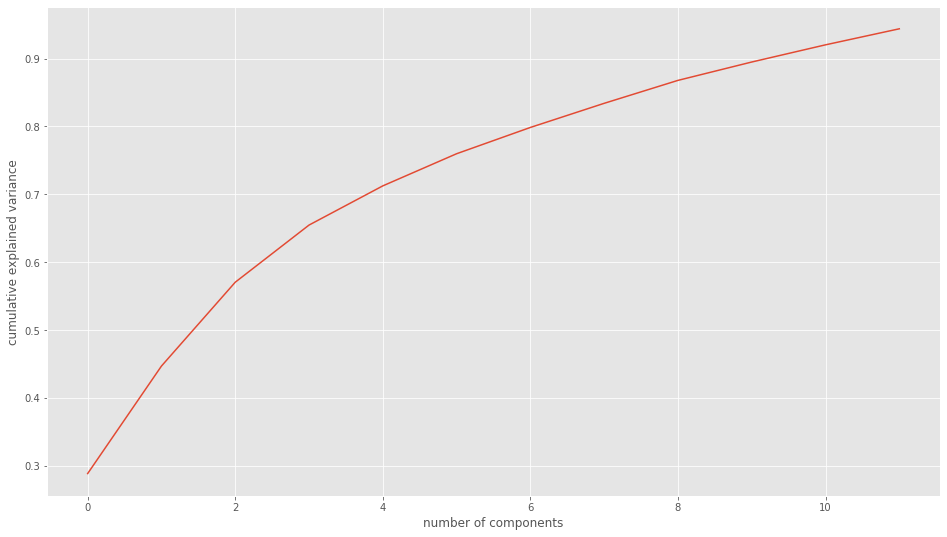

KeyError: ignored

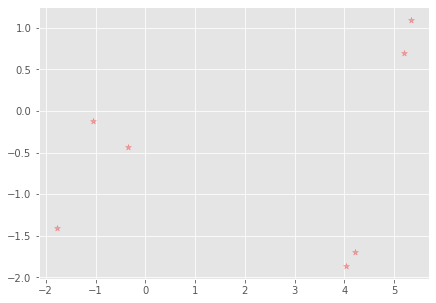

In [0]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['Price'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


Pasamos a analizar las columnas del dataset para ver si podemos eliminar alguna

In [0]:
# Todas las columnas con el sufijo Url exceden el objeto de análisis de este estudio
columns_to_drop = [
    'Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url']

# Los identificadores del alojamiento no van a influir de ninguna manera en el precio
columns_to_drop.extend(['ID','Host ID','Name','Host Name'])

# La información sobre Host en general presentan mucho ruido, muchos valores nulos, y no hacen referencia al alojamiento
columns_to_drop.extend(['Host Response Time','Host Response Rate','Host Acceptance Rate','Host Verifications',
                        'Calculated host listings count','Host Listings Count', 'Host Total Listings Count','Host Location','Host About' ])

# Los siguientes campos requerirían de un estudio con NLP. obviamente, cosas como si el alojamiento tiene o no acceso a internet, o wifi, deberían ejercer influencia.
# Pero las herramientas necesarias para su estudio, exceden los requerimientos de este trabajo
columns_to_drop.extend(['Name','Summary','Space','Description','Experiences Offered','Notes','Transit','Access','Interaction','House Rules','Amenities','Features'])

# La mayoría de los campos siguientes incluyen demasiado ruido y valores Nan. Los que no (como Country, city o Zipcode) no son necesarios puesto que solo vamos a trabajar
# con datos de Madrid . La calle (mucho ruido) y la Geolocalización no serían necesarios, puesto que vamos a usar la longitud y la latitud.
columns_to_drop.extend(['Neighborhood Overview', 'Street', 'State', 'Market', 'Smart Location','Country Code', 'Country', 'City','Zipcode','Geolocation' ])

# Presentan mucho ruido, y estarán demaasiado correlados con el precio
columns_to_drop.extend(['Weekly Price','Monthly Price'])

#Los datos sobre fechas de actualización, revisión, etc. no afectarán al alojamiento (más cuando no se registran periodos de tiempo)
columns_to_drop.extend(['Scrape ID','Last Scraped','Calendar last Scraped','Calendar Updated','First Review','Last Review'])


In [0]:
import string
punctuation = set(string.punctuation)

def tokenize(sentence):
    tokens = []
    for token in sentence.split(','):
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [0]:
df_train['Amenities'].fillna('0',inplace= True)

In [0]:

df_train['J'] = df_train['Amenities'].str.split(',')


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary=True
)

In [0]:
demo_vectorizer.fit(df_train['Amenities'])
vectors = demo_vectorizer.transform(df_train['Amenities']).toarray()

In [0]:
print(vectors.shape)

(10598, 68)


In [0]:
headers = sorted(demo_vectorizer.vocabulary_.keys())
print(headers)
df_am=pd.DataFrame(vectors, columns=headers)
df_am.shape

['0', '24hour checkin', 'air conditioning', 'baby bath', 'babysitter recommendations', 'bathtub', 'breakfast', 'buzzerwireless intercom', 'cable tv', 'carbon monoxide detector', 'cats', 'changing table', 'children’s books and toys', 'children’s dinnerware', 'crib', 'dogs', 'doorman', 'doorman entry', 'dryer', 'elevator in building', 'essentials', 'familykid friendly', 'fire extinguisher', 'first aid kit', 'free parking on premises', 'free parking on street', 'game console', 'gym', 'hair dryer', 'hangers', 'heating', 'high chair', 'hot tub', 'indoor fireplace', 'internet', 'iron', 'keypad', 'kitchen', 'laptop friendly workspace', 'lock on bedroom door', 'lockbox', 'other pets', 'outlet covers', 'pack ’n playtravel crib', 'paid parking off premises', 'pets allowed', 'pets live on this property', 'pool', 'private entrance', 'private living room', 'roomdarkening shades', 'safety card', 'self checkin', 'shampoo', 'smartlock', 'smoke detector', 'smoking allowed', 'stair gates', 'suitable for

(10598, 68)

In [0]:
df_train['Amenities'].shape

(10598,)

In [0]:
df_am.dtypes

0                                         int64
24hour checkin                            int64
air conditioning                          int64
baby bath                                 int64
babysitter recommendations                int64
bathtub                                   int64
breakfast                                 int64
buzzerwireless intercom                   int64
cable tv                                  int64
carbon monoxide detector                  int64
cats                                      int64
changing table                            int64
children’s books and toys                 int64
children’s dinnerware                     int64
crib                                      int64
dogs                                      int64
doorman                                   int64
doorman entry                             int64
dryer                                     int64
elevator in building                      int64
essentials                              

In [0]:
df_am['mascotas'] =(df_am['cats'].astype(bool)) | (df_am['dogs'].astype(bool)) | (df_am['other pets'].astype(bool))
df_am['mascotas']


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49      True
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [0]:
# Vamos a ver cuantos NAN hay en cada columna para eliminar las columnas en los que sean excesivos
# Para eso, nos aprovechamos de que la función count ignora los NaN
len(df_train) - df_train.count() 

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  0
Summary                             411
Space                              2843
Description                           2
Experiences Offered                   0
Neighborhood Overview              3965
Notes                              6598
Transit                            3986
Access                             4525
Interaction                        4548
House Rules                        3765
Thumbnail Url                      1983
Medium Url                         1983
Picture Url                          17
XL Picture Url                     1983
Host ID                               0
Host URL                              0
Host Name                             2
Host Since                            2
Host Location                        34
Host About                         4010


In [0]:
#Añadimos a la lista de columnas que liminar las que tienen más de un diez ppor ciento de NaN
columns_to_drop.extend(['Host Neighbourhood','Neighbourhood','Square Feet','Host Acceptance Rate', 'Square Feet', 'Has Availability','Security Deposit',
                        'First Review','Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
                        'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','License','Reviews per Month', 'Jurisdiction Names'])
print("Las columnas del dataset que se eliminarán son:",columns_to_drop)

#Un caso particular es el campo 'Cleaning Fee'. Tiene un número elevadísimo de NaN's (4383 sobre un total de 1059)
# Entiendo que puede influir mucho más que otros campos, así que, en principio, no se va a eliminar.
# Para que no se me olvide, , lo voy a dejar relleno. En lugar de rellenarlo con la mediana o la moda, vamos a sustituir los NaN por ceros.
# ¿Motivo?. Si miramos en la página de airbnb, hay muy pocos alojamientos que incluyan este concepto, con lo que vamos a interpretar en principio que 
# los alojamientos que carecen de este valor, es porque no lo contemplan o porque no cobran por esto
df_train['Cleaning Fee'].fillna(0., inplace=True)

#Eliminamos las columnas seleccionadas para tal efecto
df_train.drop(columns_to_drop, axis=1, inplace=True)
print ("Dimensiones del dataset tras eliminar columnas:",df_train.shape)

df_train.head().T

Las columnas del dataset que se eliminarán son: ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 'ID', 'Host ID', 'Name', 'Host Name', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Verifications', 'Calculated host listings count', 'Host Listings Count', 'Host Total Listings Count', 'Host Location', 'Host About', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Amenities', 'Features', 'Neighborhood Overview', 'Street', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 'City', 'Zipcode', 'Geolocation', 'Weekly Price', 'Monthly Price', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Calendar Updated', 'First Review', 'Last Review', 'Host Neighbourhood', 'Neighbourhood', 'Square Feet', 'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'Security Deposit', 'First Review', 'L

,0,1,2,3,4
Host Since,2015-09-11,2011-07-17,2014-05-16,2016-07-11,2012-07-31
Neighbourhood Cleansed,Justicia,Embajadores,Pueblo Nuevo,Prosperidad,Almagro
Neighbourhood Group Cleansed,Centro,Centro,Ciudad Lineal,Chamartín,Chamberí
Latitude,40.421,40.4078,40.4274,40.4393,40.4354
Longitude,-3.69743,-3.70321,-3.63376,-3.6749,-3.69778
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Private room,Private room,Private room,Entire home/apt
Accommodates,2,1,2,2,2
Bathrooms,1,1,1,2,1
Bedrooms,1,3,1,1,1


# 1.1 Análisis de datos: Correlaciones

Hacemos análisis de correlaciones

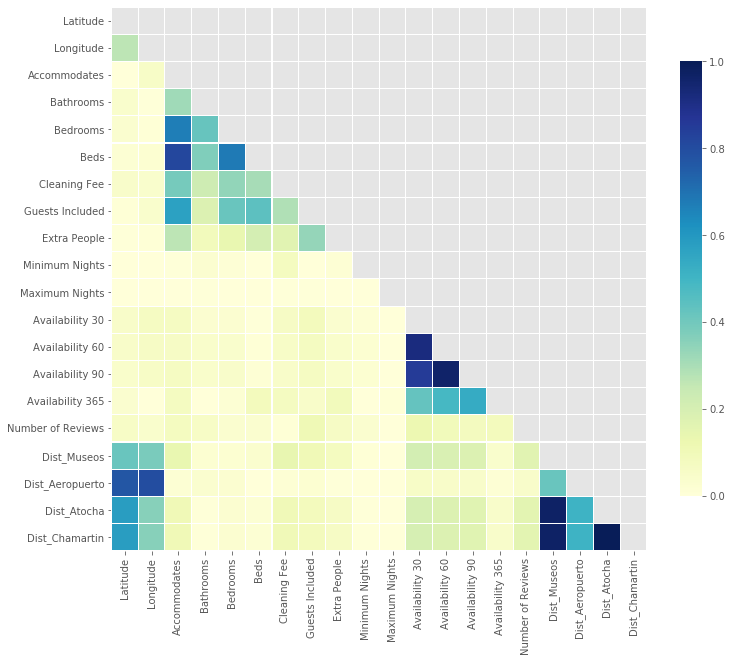

In [0]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos que 'Accomodates' está muy correlacionada con 'Beds', así que la eliminaremos. Los diferentes 'Availability' también lo están, así que los eliminaremos salvo el 'Avalilability 365'. 

La distancia entre los museos y Atocha y Chamartín tiene también fuerte correlación, así como la distancia al aeropuerto con la longitud y la latitud, así que la única distancia que dejaremos será la distancia a los museos.

Beds y Bedrooms, como sería de esperar, también están muy correlacionadas, aunque no lo suficiente como para eliminarlas

In [0]:
df_train.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90','Dist_Atocha','Dist_Chamartin','Dist_Aeropuerto'], axis=1, inplace=True)

Volvemos a generar la matriz de correlaciones, obteniendo mejores resultados

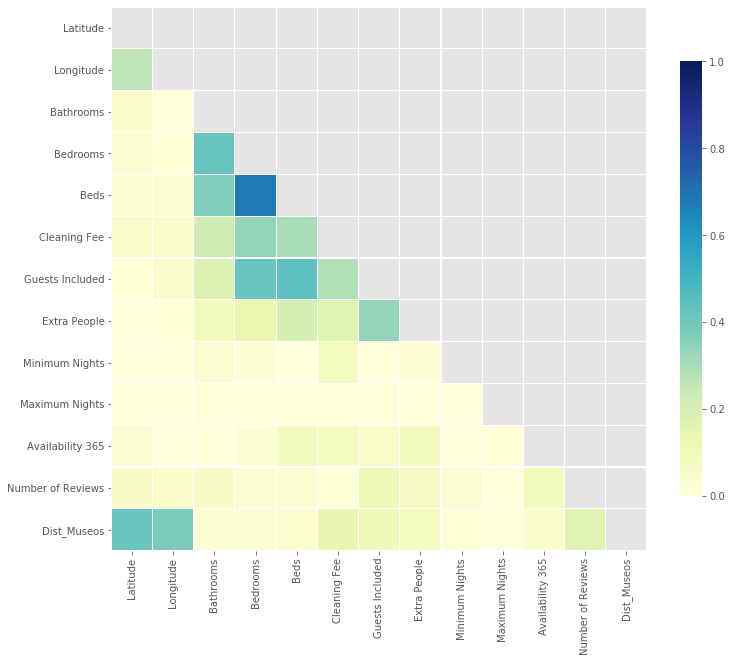

In [0]:

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

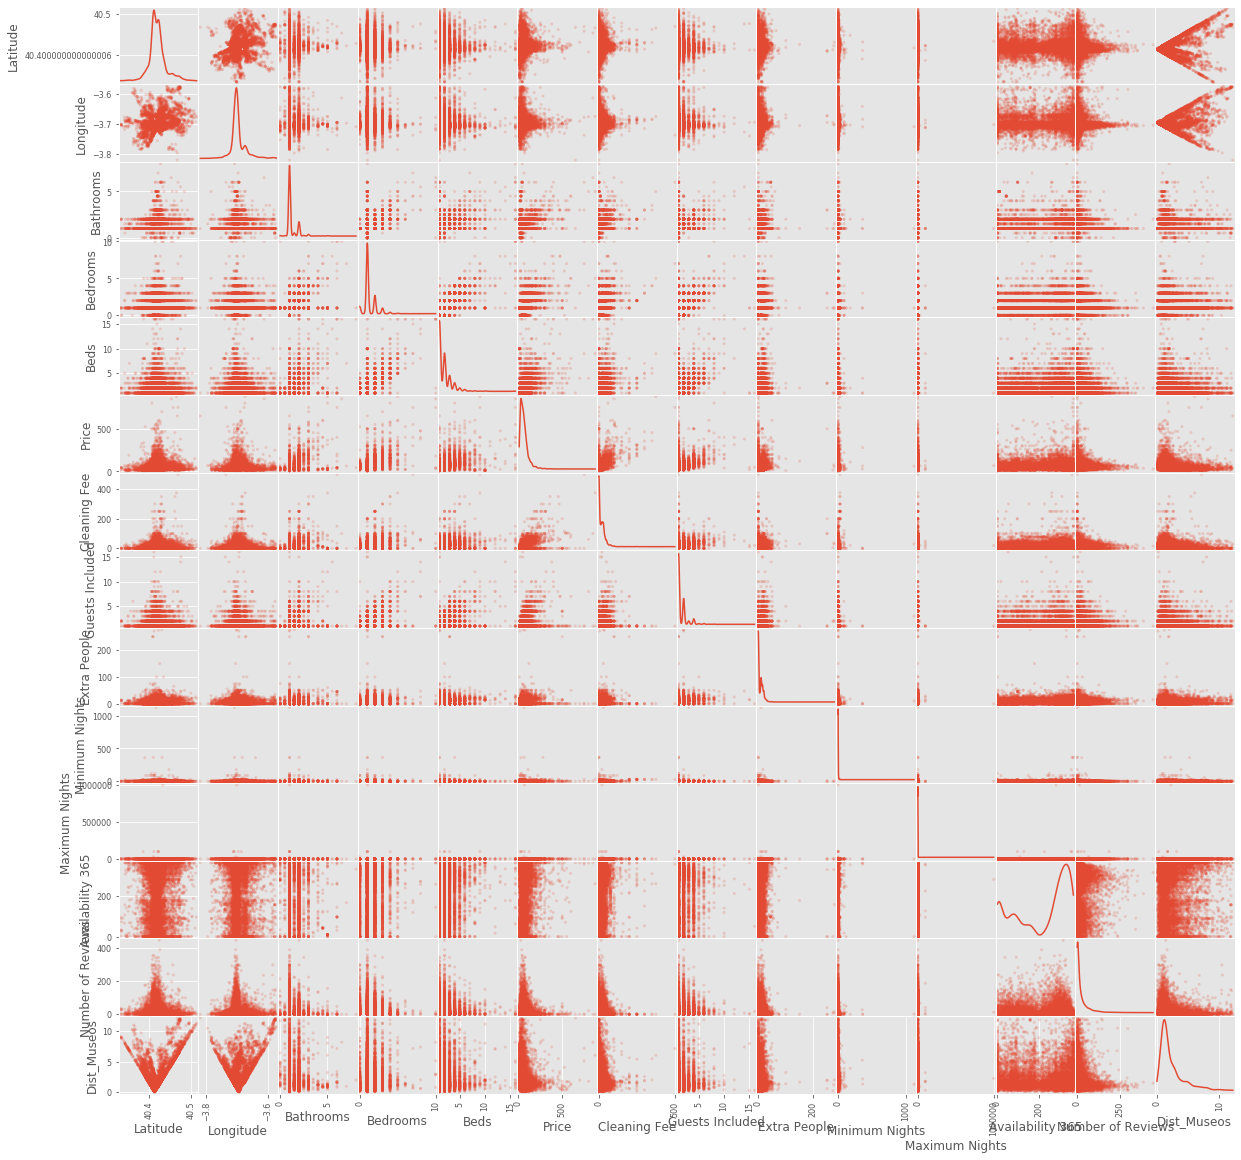

In [0]:
# Hacemos un scatter_plot para hacernos una idea de cómo se relacionan las variables que quedan
pd.plotting.scatter_matrix(df_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 1.2 Análisis de datos: La variable objetivo

Vamos a analizar nuestra variable objetivo ('Price') y a comprobar si tiene outliers. Lo comprobamos mediante un boxplot

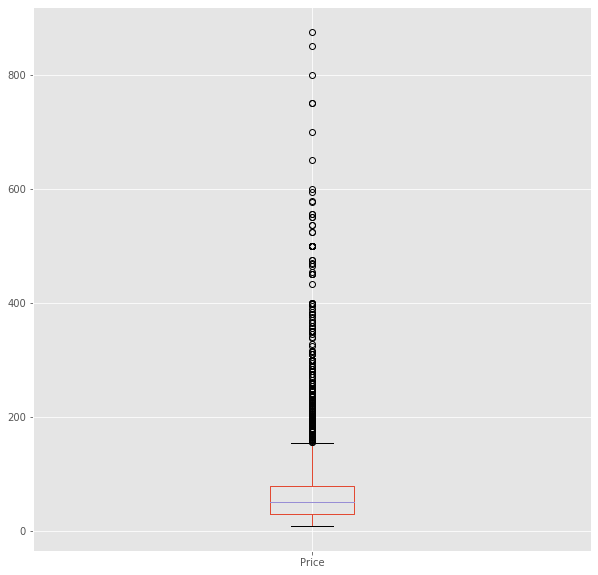

In [0]:
df_train.plot(kind='box',y='Price',grid=True,figsize=(10 ,10))

plt.show()

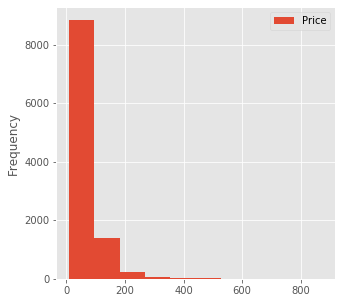

In [0]:
# Podemos también verlo en un histograma
df_train.plot(kind='hist',y='Price',grid=True,figsize=(5 ,5))

plt.show()

Vemos que se consideran outliers aproximadamente a partir de 180. Pero se ve que hasta aproximadamente el 250 hay un grupo grande de valores.

Comprobamos cuantos valores hay por encima de 250 de precio

In [0]:
# Por probar, usamos otra posible forma de filtrar. Usaremos el método query de pandas
len(df_train.query('Price > 250')['Price'])

134

134 es un número razonable de registros para eliminar

In [0]:
df_train=df_train[df_train['Price']<=250]
print("Número de registros tras eliminar los precios superiores a 250:",df_train.shape)

Número de registros tras eliminar los precios superiores a 250: (10457, 21)


In [0]:
# Aunque se veía claro en los gráficos, nos aseguramos de que no haya precios iguales a cero
print(f"Registros con precio cero: {len(df_train[df_train['Price'] == 0])}")

Registros con precio cero: 0


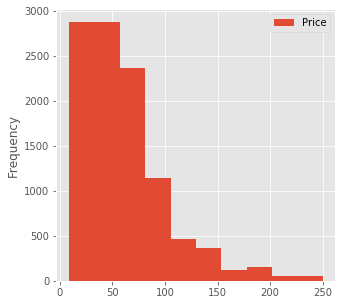

In [0]:
df_train.plot(kind='hist',y='Price',grid=True,figsize=(5 ,5))

plt.show()

## 1.3.- Analisis de datos: datos numéricos

De entre los datos numéricos, no parecería razonable tener pisos con camas y/o baños con valor cero

In [0]:
beds_0 =len(df_train[df_train['Beds'] == 0])
bathrooms_0 =len(df_train[df_train['Bathrooms'] == 0])
print("Número de alojamientos sin camas:",beds_0)
print("Número de alojamientos sin Baños:",bathrooms_0)

Número de alojamientos sin camas: 0
Número de alojamientos sin Baños: 51


Vemos que no hay alojamientos sin camas, pero sí los hay sin baños. Antes de eliminarlos vamos a estudiar si esto tiene algún motivo

In [0]:
df_NoBathrooms= df_train[df_train['Bathrooms'] == 0]
df_NoBathrooms['Room Type'].value_counts()


Private room       44
Shared room         4
Entire home/apt     3
Name: Room Type, dtype: int64

Vemos que la gran mayoría de alojamientos sin baño son 'Private room' o 'Shared room, con lo cual es razonable que no haya baño dentro de la habitación.

Pero hay varios 'Entire home /apt', y estos sí que no tiene sentido que no tengan baño. Como solo son dos, los vamos a eliminar

In [0]:
sin_bath=len(df_train[(df_train['Bathrooms'] == 0) & (df_train['Room Type'] =='Entire home/apt')])
print('Número de alojamientos sin baño que se alquilan enteros:',sin_bath)

print('Alojamientos antes de eliminar con baño =0 :',df_train.shape)
df_train.drop(df_train[(df_train['Bathrooms'] == 0) & (df_train['Room Type'] =='Entire home/apt')].index,inplace=True)
print('Alojamientos después de eliminar con baño =0 :',df_train.shape)

Número de alojamientos sin baño que se alquilan enteros: 3
Alojamientos antes de eliminar con baño =0 : (10457, 21)
Alojamientos después de eliminar con baño =0 : (10454, 21)


In [0]:
# Rellenamos el resto de los valores numéricos vacíos con la media de la columna
# Recordar que los valores vacíos de 'Cleaning Fee' se rellenaron a cero con anterioridad.
df_train.fillna(df_train.mean(), inplace=True)
df_train.isnull().any()

Host Since                       True
Neighbourhood Cleansed          False
Neighbourhood Group Cleansed    False
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Bathrooms                       False
Bedrooms                        False
Beds                            False
Bed Type                        False
Price                           False
Cleaning Fee                    False
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability 365                False
Number of Reviews               False
Cancellation Policy             False
Dist_Museos                     False
dtype: bool

## 1.4- Análisis de datos: datos categóricos

Respecto a los Neighbourhood, podríamos usar cualquiera de los dos campos con el sufijo Cleansed. Usaremos el 'Neighbourhood Group Cleansed', que ya hemos visto que no tiene valores vacíos, y que agrupa la  información (por ejemplo en Centro incluye Embajadores, Palacio, Sol, etc.). Así que el campo  'Neighbourhood Cleansed' se puede eliminar.

In [0]:
df_train.drop(['Neighbourhood Cleansed'],axis=1,inplace=True)

In [0]:
# Comprobamos que variables de tipo object quedan
df_train.select_dtypes(include=['object']).columns

Index(['Host Since', 'Neighbourhood Group Cleansed', 'Property Type',
       'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')

In [0]:
#Comprobamos que 'Host Since tiene dos valores en blanco. Los eliminaremos'
len(df_train) -df_train['Host Since'].count()

2

In [0]:
# Además de eliminar los NaN, este campo tiene fechas completas.
# Vamos a sustituirlas por los años de diferencia respecto al año 2017 (que esa el año de los datos del dataset)
#Crearemos la columna 'Years Host'
from datetime import datetime

df_train['Host Since'].dropna(inplace=True) 
df_train['Host Since'] = df_train['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_train['Years Host'] = df_train['Host Since'].apply(lambda x: 2017 - x.year)
df_train['Years Host'].dropna(inplace=True) 
df_train.drop(['Host Since'], axis=1, inplace=True)

In [0]:
df_train.columns

Index(['Neighbourhood Group Cleansed', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Dist_Museos',
       'Years Host'],
      dtype='object')

In [0]:
# El resto de las variables categóricas, lo vamos a categorizar.
# Para ello, crearemos grupos numéricos en función del valor del precio
categorical = [ 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy','Neighbourhood Group Cleansed']

# Creamos un diccionario que deberemos usar posteriormente para categorizar los datos de test
mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean

No es imprescindible, pero a la hora de trabajar nos va a resultar más cómo situar la columna 'Price' en primer lugar del dataset

In [0]:
columns = df_train.columns.tolist()
columns.insert(0, columns.pop(columns.index('Price')))
df_train = df_train[columns]
df_train.describe()

,Price,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Dist_Museos,Years Host
count,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10454.000000,10452.000000
mean,61.430936,61.430936,40.420375,-3.697114,61.430936,61.430936,1.235308,1.264545,1.937584,61.430936,16.393247,1.550411,7.379089,2.920987,988.890090,204.910561,23.205185,61.430936,2.343873,2.686663
std,40.464262,12.163036,0.020084,0.023447,5.981231,24.325335,0.561072,0.760516,1.398275,1.528422,20.831267,1.017917,10.235011,13.052627,10027.447389,127.294366,38.826063,6.603186,2.007731,1.626638
min,9.000000,30.500000,40.331888,-3.795734,17.000000,27.099338,0.000000,0.000000,1.000000,41.344828,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,53.437482,0.005298,0.000000
25%,30.000000,52.739255,40.409962,-3.707799,63.330226,32.449335,1.000000,1.000000,1.000000,61.638481,0.000000,1.000000,0.000000,1.000000,365.000000,82.000000,1.000000,53.437482,1.059097,1.000000
50%,50.000000,68.986289,40.418331,-3.701575,63.330226,81.700551,1.000000,1.000000,1.000000,61.638481,10.000000,1.000000,5.000000,2.000000,1125.000000,246.000000,7.000000,60.525191,1.600844,2.000000
75%,80.000000,68.986289,40.427786,-3.693838,63.330226,81.700551,1.000000,1.000000,2.000000,61.638481,30.000000,2.000000,14.000000,3.000000,1125.000000,320.000000,28.000000,69.041400,2.908419,4.000000
max,250.000000,73.160954,40.514125,-3.573613,130.000000,81.700551,8.000000,10.000000,16.000000,61.638481,250.000000,16.000000,276.000000,1125.000000,1000000.000000,365.000000,446.000000,106.500000,12.164470,8.000000


In [0]:
print(df_train.shape)
df_train.dropna(inplace=True)
print(df_train.shape)
len(df_train) -df_train['Years Host'].count()

(10454, 20)
(10452, 20)


0

# 2.- Creación del modelo

In [0]:
dataframe = df_train[:]
print(dataframe.tail(15))
dataframe.fillna(0,inplace=True)
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['Price'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=12) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:8]))
print(X_pca)
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 

       Price  Neighbourhood Group Cleansed   Latitude  Longitude  \
11180  120.0                     68.986289  40.422249  -3.701926   
11181   20.0                     35.578125  40.406694  -3.650897   
11182   55.0                     68.986289  40.413163  -3.699508   
11183   17.0                     68.986289  40.411199  -3.703326   
11184   69.0                     68.986289  40.412288  -3.698932   
11186   21.0                     41.519841  40.474583  -3.665453   
11189   20.0                     35.578125  40.404762  -3.640181   
11190   27.0                     73.160954  40.428049  -3.676932   
11192   90.0                     65.537958  40.433539  -3.699583   
11194   80.0                     46.081040  40.405384  -3.692763   
11195   28.0                     68.986289  40.409222  -3.701580   
11196   80.0                     68.986289  40.428188  -3.709537   
11197   22.0                     73.160954  40.437383  -3.675085   
11198  100.0                     63.026012  40.4

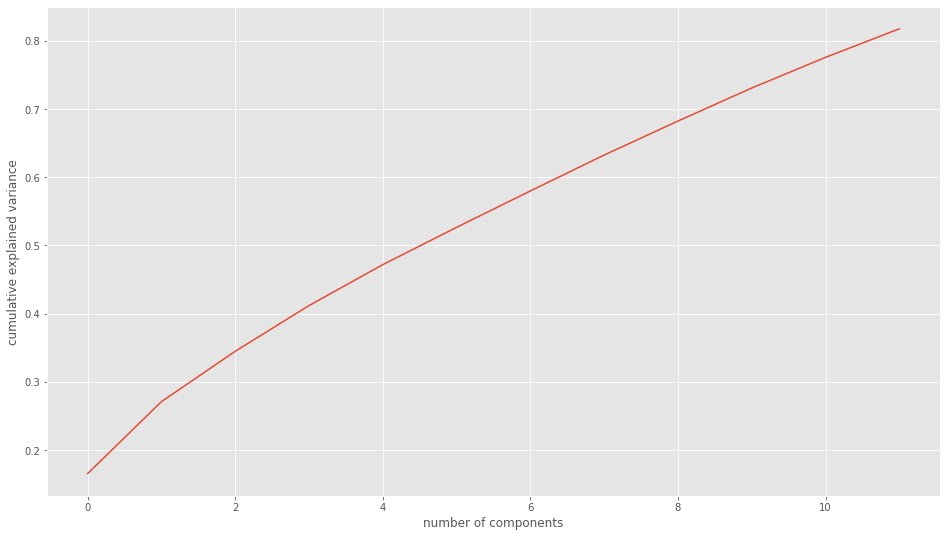

KeyError: ignored

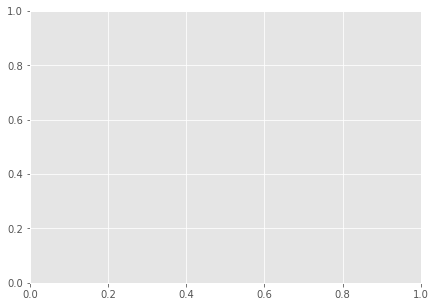

In [0]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['Price'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


In [0]:
# Comprobamos si queda algún campo con valores Nan
nan_rows = df_train[df_train.isnull().any(1)]
nan_rows

,Price,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Dist_Museos,Years Host


In [0]:
df_train.isnull().any()

Price                           False
Neighbourhood Group Cleansed    False
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Bathrooms                       False
Bedrooms                        False
Beds                            False
Bed Type                        False
Cleaning Fee                    False
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability 365                False
Number of Reviews               False
Cancellation Policy             False
Dist_Museos                     False
Years Host                      False
dtype: bool

In [0]:
#cargamos las librerías necesarias para procesar los datos de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = df_train.values

# Para el y_train nos quedamos con la primera columna (recordar que movimos el precio a la primera posición)
y_train = data[:,0:1] 
#Para los datos nos quedamos con el resto de las columnas
X_train = data[:,1:]      

feature_names = df_train.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -678.400
best parameters: {'alpha': 0.14909716571840642}


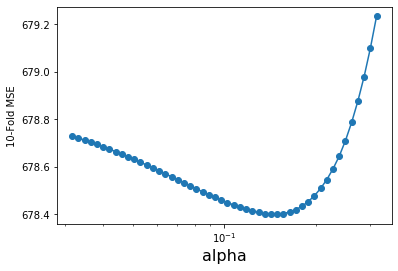

In [0]:
# Vamos a hacer una validación cruzada de los datos de entrenamiento con GridSearchCV y Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5,-0.5)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [0]:
#Vamos a cargar los datos de test, y repetimos todos los pasos que hemos dado con los datos de entrenamiento
df_test = pd.read_csv('./data/test.csv', sep=';', decimal='.')
print(df_test.columns)
print(columns_to_drop)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [0]:
df_test= df_test[df_test['Smart Location'].isin(lista_madrid_0)]

df_test['Dist_Museos']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_museos,lon_museos),axis=1)


df_test['Dist_Aeropuerto']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_aeropuerto,lon_aeropuerto),axis=1)


df_test['Dist_Atocha']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_atocha,lon_atocha),axis=1)


df_test['Dist_Chamartin']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_atocha,lon_atocha),axis=1)


df_test['Dist_Aeropuerto']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_aeropuerto,lon_aeropuerto),axis=1)

df_test['Cleaning Fee'].fillna(0., inplace=True)
df_test['Dist_Aeropuerto']=df_test.apply(lambda row:haversine(row.Latitude, row.Longitude,lat_aeropuerto,lon_aeropuerto),axis=1)
df_test.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90','Dist_Atocha','Dist_Chamartin','Dist_Aeropuerto'], axis=1, inplace=True)
df_test=df_test[df_test['Price']<=250]
df_test.drop(df_test[(df_test['Bathrooms'] == 0) & (df_test['Room Type'] =='Entire home/apt')].index,inplace=True)

df_test.fillna(df_test.mean(), inplace=True)
df_test.drop(['Neighbourhood Cleansed'],axis=1,inplace=True)
df_test['Host Since'].dropna(inplace=True) 
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Years Host'] = df_test['Host Since'].apply(lambda x: 2017 - x.year)
df_test['Years Host'].dropna(inplace=True) 
df_test.drop(['Host Since'], axis=1, inplace=True)
categorical = [ 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy','Neighbourhood Group Cleansed']

#Para categorizar, vamos a usar el diccionrio que creamos al entrenar, para tener categorías equivalentes
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])
columns_t = df_test.columns.tolist()
columns_t.insert(0, columns_t.pop(columns_t.index('Price')))
df_test = df_test[columns_t]
print('Dimensión del dataset de test:',df_test.shape)

print('Comprobamos si hay algún valor NaN en el dataset de test')
df_test.isnull().any()

Dimensión del dataset de test: (2621, 20)
Comprobamos si hay algún valor NaN en el dataset de test


Price                           False
Neighbourhood Group Cleansed    False
Latitude                        False
Longitude                       False
Property Type                    True
Room Type                       False
Bathrooms                       False
Bedrooms                        False
Beds                            False
Bed Type                        False
Cleaning Fee                    False
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability 365                False
Number of Reviews               False
Cancellation Policy             False
Dist_Museos                     False
Years Host                       True
dtype: bool

In [0]:
# Comprobamos cuantos nulos tenemos en 'Property Type'
len(df_test)-df_test['Property Type'].count()

1

In [0]:
# Comprobamos cuantos nulos tenemos en 'Years Host'
len(df_test)-df_test['Years Host'].count()

1

In [0]:
#Eliminamos los registros con NaN
print('Dimensiones antes de eliminar nulos:',df_test.shape)
df_test.dropna(inplace=True)
print('Dimensiones después de eliminar nulos:',df_test.shape)

Dimensiones antes de eliminar nulos: (2621, 20)
Dimensiones después de eliminar nulos: (2619, 20)


In [0]:
#Comprobamos si queda alguna variable sin categorizar
df_test[categorical].dtypes

Property Type                   float64
Room Type                       float64
Bed Type                        float64
Cancellation Policy             float64
Neighbourhood Group Cleansed    float64
dtype: object

In [0]:
data_test = df_test.values

y_test = data_test[:,0:1]     
X_test = data_test[:,1:]      

feature_names_test = df_test.columns[1:]

# Vamos a normalizar igual que en el entrenamiento
XtestScaled = scaler.transform(X_test) 

In [0]:
# Aplicamos Lasso y comprobamos cual es el error cuadrático medio
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 674.22
MSE Modelo Lasso (test) : 717.6
Neighbourhood Group Cleansed 5.674814111129948
Latitude 0.597206491014047
Longitude 0.6094898433015034
Property Type -0.0
Room Type 15.84677174524046
Bathrooms 3.943205754013567
Bedrooms 9.290364116204229
Beds 3.211811156816535
Bed Type 0.49746071845866424
Cleaning Fee 7.247776968181791
Guests Included 3.276320999941449
Extra People -1.6688476075257164
Minimum Nights -0.5532133269054959
Maximum Nights -0.0
Availability 365 2.541303243183184
Number of Reviews -3.6588572932405268
Cancellation Policy -1.1786161855121304
Dist_Museos -0.9605144210966222
Years Host 0.7100252606266124


Usaremos para nuestro modelo GradientBoostingRegressor, pensando que es el algoritmo que nos va a dar mejores resultados.
Ejecutamos en primer lugar el siguiente código.

Lo pongo como texto porque, se pasan tres argumentos, entre los que se incluye max_depth. Esto supone un gran coste computacional (tarda en calcular cerca de las dos horas). Por ello, para no penalizar los cálculos que se hacen con posterioridad, lo pongo como texto. El resultado de su ejecución nos da como valor ótipimo para *max_depth cuatro* 


from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500, 1000, 5000]
learningRate = [0.1, 0.01,0.05]
max_depth = [2,3,4]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate,'max_depth':max_depth }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Este sería el resultado obtenido:
best mean cross-validation score: 0.721
best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}

In [0]:
#repetimos el proceso, dejando fijo el max_depth a cuatro, y cambiando ligeramente los valores de Niterations,
# dado que, en la ejecución anterior nos dio un valor de 500, probamos con un valor inferior

from sklearn.ensemble import GradientBoostingRegressor

Niterations0 = [400,500,1000]
learningRate0 = [0.01,0.05]


param_grid0 = {'n_estimators': Niterations0,'learning_rate':learningRate0 }
grid0 = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth = 4), param_grid=param_grid0, cv = 5)
grid0.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid0.best_score_))
print("best parameters: {}".format(grid0.best_params_))

best mean cross-validation score: 0.721
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


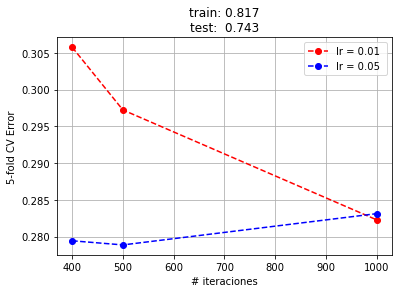

In [0]:
#Mostramos el resultado de la ejecución del modelo
lRateOptimo = grid0.best_params_['learning_rate']
nEstimatorsOptimo = grid0.best_params_['n_estimators']


bt0 = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt0.fit(X_train,y_train)

error = 1-grid0.cv_results_['mean_test_score'].reshape(len(learningRate0),len(Niterations0))

colors = ['r','b','g','k','m']

for i,lr in enumerate(learningRate0): 
    plt.plot(Niterations0,error[i,:],colors[i] + '--o',label='lr = %g '%lr )

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt0.score(X_train,y_train),bt0.score(X_test,y_test)))
plt.grid()
plt.show()

In [0]:
#Hacemos otra prueba a ver si el modelo mejora

Niterations1 = [200,400,500]
learningRate1 = [0.01,0.05]


param_grid1 = {'n_estimators': Niterations1,'learning_rate':learningRate1 }
grid1 = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth = 4), param_grid=param_grid1, cv = 5)
grid1.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))

best mean cross-validation score: 0.721
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


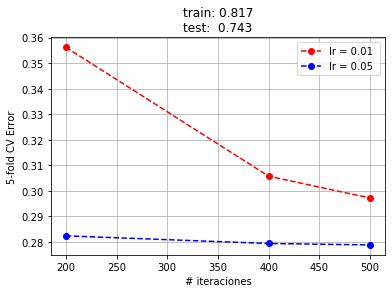

In [0]:
lRateOptimo1 = grid1.best_params_['learning_rate']
nEstimatorsOptimo1 = grid1.best_params_['n_estimators']


bt1 = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate=lRateOptimo1, n_estimators=nEstimatorsOptimo1)
bt1.fit(X_train,y_train)

error1 = 1-grid1.cv_results_['mean_test_score'].reshape(len(learningRate1),len(Niterations1))

colors = ['r','b','g','k','m']

for i,lr in enumerate(learningRate1): 
    plt.plot(Niterations1,error1[i,:],colors[i] + '--o',label='lr = %g '%lr )

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt1.score(X_train,y_train),bt1.score(X_test,y_test)))
plt.grid()
plt.show()

In [0]:
# Probamos con max_depth = 3 por si acaso con otros parámetos tenemos valores direrentes
Niterations2 = [200,400,500]
learningRate2 = [0.01,0.05]


param_grid2 = {'n_estimators': Niterations1,'learning_rate':learningRate1 }
grid2 = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth = 3), param_grid=param_grid2, cv = 5)
grid2.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))

best mean cross-validation score: 0.721
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


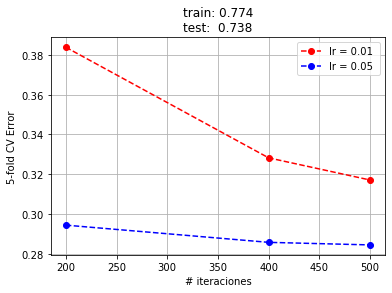

In [0]:



bt2 = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=0.05, n_estimators=500)
bt2.fit(X_train,y_train)

error2 = 1-grid2.cv_results_['mean_test_score'].reshape(len(learningRate1),len(Niterations1))

colors = ['r','b','g','k','m']

for i,lr in enumerate(learningRate1): 
    plt.plot(Niterations1,error2[i,:],colors[i] + '--o',label='lr = %g '%lr )

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt2.score(X_train,y_train),bt2.score(X_test,y_test)))
plt.grid()
plt.show()

Los resultados empeoran, así que nos quedarmos con los parámetros del caso anterior, que da mejor resultado y este es bastante aceptable, aunque sería deseable una menor diferencia entre los resultados de train y test

Creamos un gráfico que muestre qué importancia se da a los datos que se han usado para crear el modelo

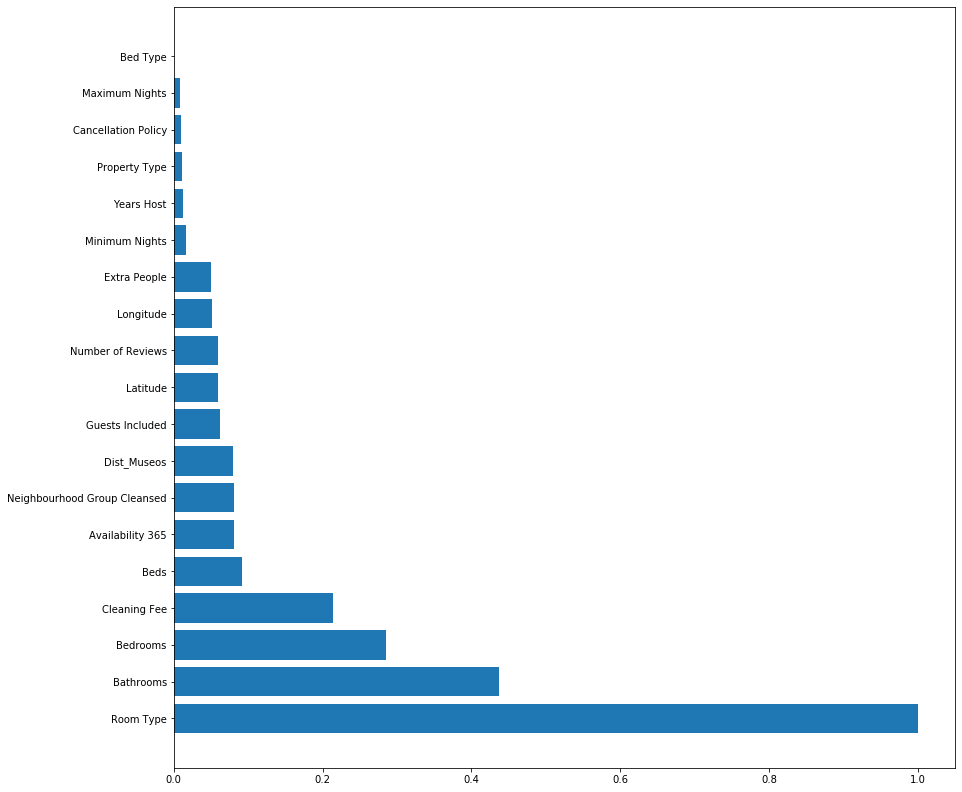

In [0]:
importances = bt1.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])

plt.show()

No creo  que sorprenda que el dato más importante es sea el tipo de habitación,
seguido  de baños y camas (yo probablemente hubiera esperado el resultado al revés).

También es muy razonable que el barrio tenga un peso prácticamente equivalente a la distancia a los Museos.

A mi particularmente me sorprenden las posiciones ocupadas por la tasa de limpieza y la disponibilidad 365
(más altas de lo esperable), así como el tipo de propiedad (mucho más bajo de lo que yo preveía).
